<a href="https://colab.research.google.com/github/Akashjaiswall/AirBNB-booking-analysis/blob/main/Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Airbnb?

## Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?  </b>


####Importing Libraries 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

####Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_path = '/content/drive/MyDrive/data/Airbnb_NYC_2019.csv'
df=pd.read_csv(file_path)

####Importing Dataset From Drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

###Taking Necessary Columns Only

In [ ]:
#Taken only neccessary columns for better understanding.
new_df = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


##1. What can we learn about different hosts and areas?

In [ ]:
hosting_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosting_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)


,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


##As we can see most number of listings are from **Manhattan** created Sonder (NYC), Blueground, kara, kazuya


##2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
review_by_areas = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
review_by_areas

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


# Creating a Bar plot with the extracted Data(using matplotlib)

In [ ]:
area = review_by_areas['neighbourhood_group']
review = review_by_areas['number_of_reviews']


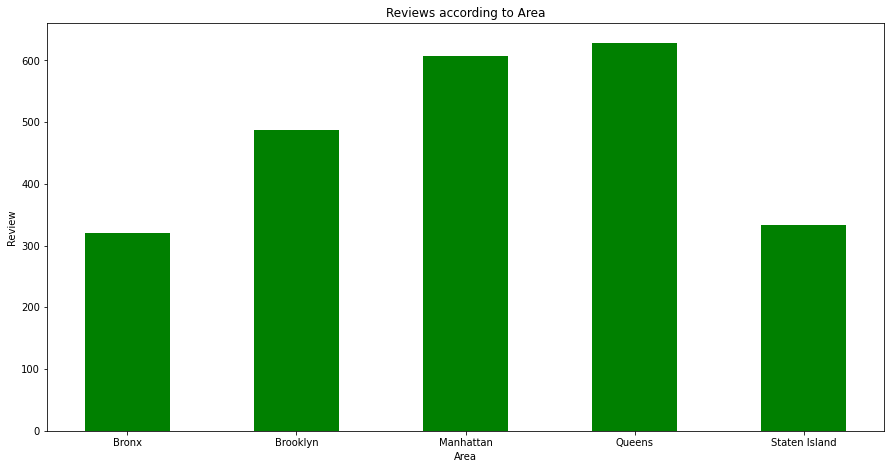

In [ ]:
fig = plt.figure(figsize = (15,7.5))

plt.bar(area, review, color ='green',
        width = 0.5)
 
plt.xlabel("Area")
plt.ylabel("Review")
plt.title("Reviews according to Area")
plt.show()

In [ ]:
price_area = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


## The above analysis concludes that most people prefer to stay in place where price is comparatively less
 

##3.Which hosts are the busiest and why?

In [ ]:
busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


# Creating a Bar plot with the extracted Data(using matplotlib)

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']


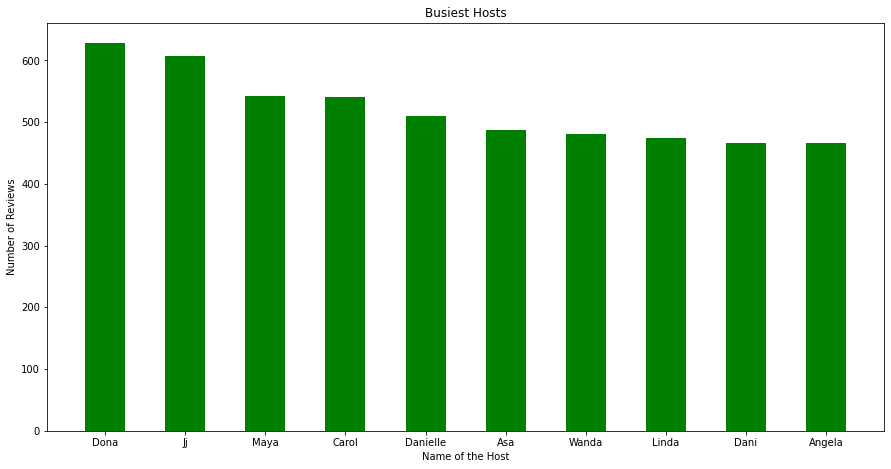

In [ ]:
fig = plt.figure(figsize = (15, 7.5))
 

plt.bar(name, reviews, color ='green',
        width = 0.5)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

##Most Busiest hosts are:

1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

###This hosts are the busiest because these hosts listed entire and private rooms which is prefered by most of the people.

##4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
traffic_in_different_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_in_different_areas = traffic_in_different_areas.sort_values(by='minimum_nights', ascending=False)
traffic_in_different_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


# Creating a Bar plot with the extracted Data(using matplotlib)

In [ ]:
room_type = traffic_in_different_areas['room_type']
stayed = traffic_in_different_areas['minimum_nights']


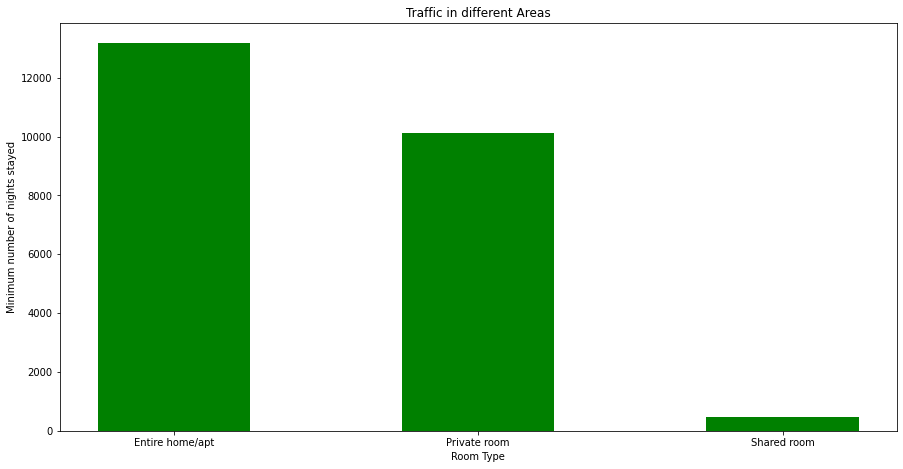

In [ ]:
fig = plt.figure(figsize = (15, 7.5))
 
plt.bar(room_type, stayed, color ='green',
        width = 0.5)

plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic in different Areas")
plt.show()


##->From the above analysis we can conclude that people prefer entire home or private rooms and listings which are less in price.

### Entire home/apt or Private rooms are mostly present in Manhattan, Brooklyn, Queens.

##What's factors makes Airbnb successful-:
### ->Any service provider is successful if it has.
### ->A high average user ratings.
### ->Focus on User Experience.
### ->A good number of positive reviews.
### ->A good number of monthly average users.
### ->High revenue per customer and so on.

# Analysis summary
###1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.


###2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.


###3. Most people prefer to pay less price.

###4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.

###5. If people are not staying more then one night means they are travellers



# Conclusion
###</b>From this EDA project, the following concepts were learnt:
###* Basic inspection of the raw data.
###* Handing the duplicate, error and NaN values present in the dataset, ie, cleaning the data.
###* Using different Python functions and libraries to clean and manipulate data.
###* Data wrangling to come up with different insights on the data.
###* Designing multiple visualizations to summarize the information in the dataset and successfully communicate the results and trends to the reader.</b>

###</b>Different Python libraries used to complete this EDA:
###* Pandas
###* NumPy
###* Matplotlib.Pyplot </b>




---


#Thanks 


